Preeti Birajdar


Bharat Intern



Task 1: Forecasting the sales of Supermarket

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv('/content/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [7]:
df = df.drop_duplicates()

**Data Anaytics and Visualization**

Top 15 cites w.r.t sales


In [8]:
top_cities = df.groupby('City').sum().sort_values('Sales',ascending=False).head(15)
top_cities['Sales'] = top_cities['Sales'].round(2)
top_cities = top_cities.reset_index()

<ipython-input-8-3695c5564bcc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_cities = df.groupby('City').sum().sort_values('Sales',ascending=False).head(15)


In [9]:
fig = px.bar(top_cities,x='City',y='Sales',title='Top 15 Cities w.r.t Sales')
fig.show()

Top 15 States w.r.t Sales

In [10]:
top_states = df.groupby('State').sum().sort_values('Sales',ascending=False).head(15)

top_states['Sales'] = top_states['Sales'].round(2)
top_states = top_states.reset_index()

<ipython-input-10-d6290ca2a398>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [11]:
fig = px.bar(top_states,x='State',y='Sales',title='Top 15 States w.r.t Sales')
fig.show()

Sales of category w.r.t to sales

In [12]:
sales_of_category = df.groupby('Category').sum().sort_values('Sales',ascending=False)

sales_of_category['Sales'] = sales_of_category['Sales'].round(2)
sales_of_category = sales_of_category.reset_index()

fig = px.bar(sales_of_category,x='Category',y='Sales',title='Sales of category w.r.t to sales')
fig.show()

<ipython-input-12-fc8a988374f3>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Segment

In [13]:
fig = px.pie(df,names='Segment',title='Segment',values=np.ones(df.shape[0])
             ,color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

Category

In [14]:
fig = px.pie(df,names='Category',title='Category',values=np.ones(df.shape[0])
             ,color_discrete_sequence=px.colors.sequential.algae)
fig.show()

Which category has the most sales?

In [15]:
top_sales_category = df.groupby('Category').sum()['Sales'].reset_index()

fig = px.pie(top_sales_category,names='Category',values='Sales'
             ,title='Category w.r.t Sales',color_discrete_sequence=px.colors.sequential.deep)
fig.show()

<ipython-input-15-14169ebb24d7>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Top Category w.r.t City and Sales

<ipython-input-16-6f84f245e4af>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



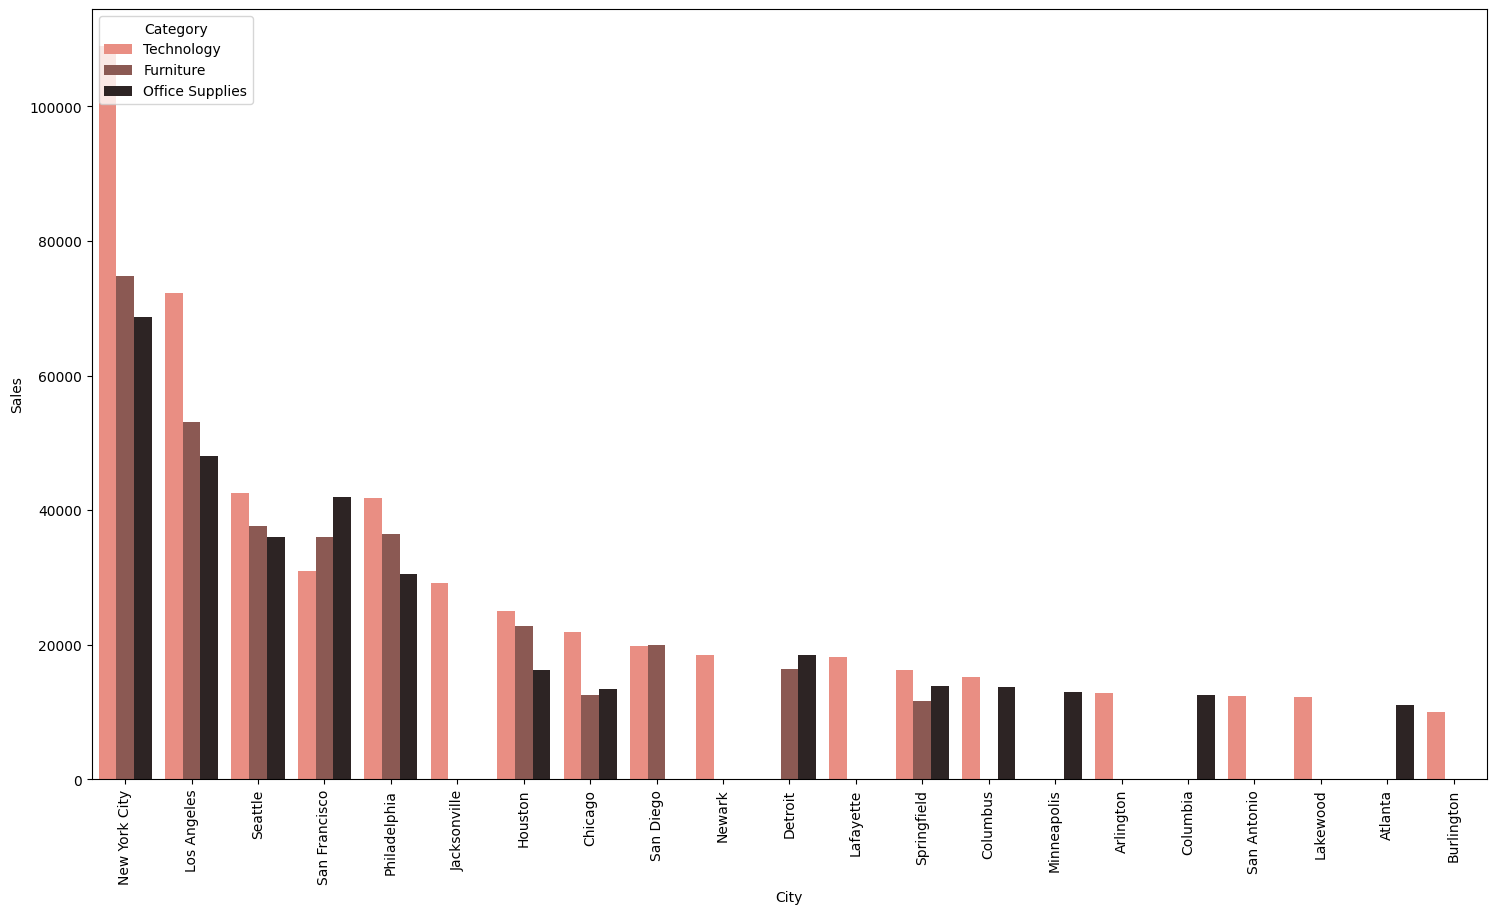

In [16]:
plt.figure(figsize=(18,10))

top_cities = df.groupby(['Category','City']).sum().sort_values('Sales',ascending=False).head(40)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)

sns.barplot(x='City',y='Sales',hue='Category',data=top_cities,palette='dark:salmon_r')
plt.xticks(rotation='vertical')
plt.show()